## Tutorial on Nilearn Plotting utilities

### In this tutorial, we show how to use plotting tools from Nilearn package for an easy visualization of Neuroimaging datasets and statistical analysis results.

Nilearn provides set of tools designed specifically to visualize Brain volumes such as anatomical/structural images, functional /EPI images, Region of Interest (roi) images, statistical maps, statistical maps overlayed on glass brain image as background, 4D atlas maps, connectomes between brain regions.

In [4]:
%matplotlib inline

### General guidelines

* Nilearn can plot any human brain images which are in standard Nifti files, or example, .nii or .nii.gz or .img. Nilearn can even accept filename of the Nifti image, loading it for you. For example see the demonstration below.

In [5]:
# filename of the Nifti image
filename_Nifti = '/home/kamalakar/Kamalakar/work/nilearn/nilearn/datasets/data/avg152T1_brain.nii.gz'

# We use nilearn utilities to load filename of the Nifti image
from nilearn._utils import check_niimg

filename_Nifti_to_image_object = check_niimg(filename_Nifti)
print(filename_Nifti_to_image_object) # Easily see the information of the image affine, shape, type of image, etc.

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8000.0
cal_min         : 3000.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FSL3.3
aux_file        : 
qform_code      : mni
sform_code      : mni


* Nilearn plotting tools by default uses standard anatomical Montreal Neurological Image (MNI) template brain image as a background, same template as used in SPM & FSL software. To be well overlay on any mask image or statistical map, the image should be realigned to MNI space. One easy identification whether image is in MNI space or not, is to check the coordinates of (x, y, z) = (0, 0, 0) to be aligned with the anterior / posterior commissural line (AC/PC line) as shown in below demonstration.

* On the other hand, Nilearn does not provide interactive visualization of functional images (3D + t) like in other softwares.

## Plotting tools 

### Plotting Anatomical images

We show here, how to plot anatomical image using tool: `plotting.plot_anat`

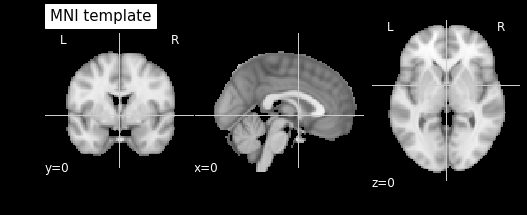

In [6]:
# First, we fetch and load the default anatomical image available in Nilearn datasets module
from nilearn import datasets

# default MNI152 template
anatomical_image = datasets.load_mni152_template()

# Then, import plotting module from nilearn to easily visualize the loaded image
from nilearn import plotting

# To plot anatomical image
plotting.plot_anat(anatomical_image, cut_coords=(0, 0, 0), title='MNI template')

#### By default, all images are displayed in three directional mode 'x', 'y', 'z' corresponds to 'sagittal', 'coronal', 'axial' unless there is a change in parameter from display_mode='ortho' to specific unidirectional display_mode='x' or display_mode='xz' or 'yz' (two directional)

### Plotting raw functional images

We show here, how to plot raw functional brain images using tool: `plotting.plot_epi`.

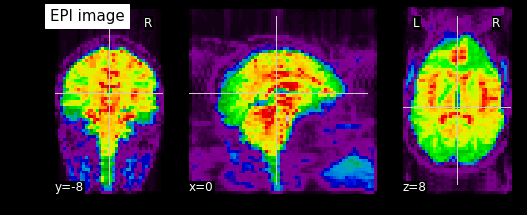

In [3]:
# First, we fetch and load the functional images available in Nilearn datasets module
# No need to import again since we imported datasets module on top

# Loading functional images of only one subject
data = datasets.fetch_haxby(n_subjects=1)

# Raw functional image filename
functional_filename = data.func[0] # path of the single subject image with .nii.gz

# We compute the mean of the image from (x, y, z, t) bold image to (x, y, z), averaging in time domain
from nilearn.image import mean_img

mean_functional_image = mean_img(functional_filename)

# Visualizing mean of the single functional image
plotting.plot_epi(mean_functional_image, title='EPI image')

#### By default, the coordinates in three directional mode 'x', 'y', 'z' are chosen automatically no need of explicitly specifying them.

### Plotting Region of Interest (ROI) images

We show here, how to overlay ROI images or mask images onto anatomical image, using one tool: `plotting.plot_roi`

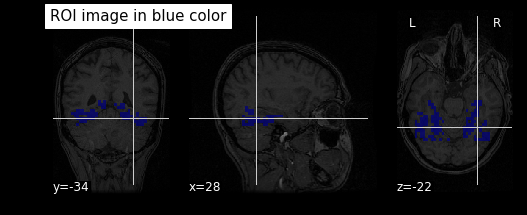

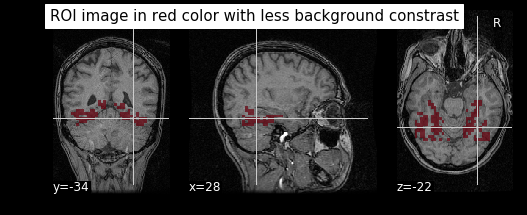

In [4]:
# We make use of previously imported subject data and loading specifically mask and anatomical filenames

# Anatomical image filename
anatomical_filename = data.anat[0]

# Mask image filename
mask_filename = data.mask_vt[0] # visual cortex mask image

# Visualizing the overlay of mask image onto its own anatomical image
plotting.plot_roi(roi_img=mask_filename, bg_img=anatomical_filename,
                  title='ROI image in blue color')
# Visualizing with dimming `dim=-1` the constrast of background image
# and selecting color using cmap='Reds_r'
plotting.plot_roi(roi_img=mask_filename, bg_img=anatomical_filename,
                  dim=-1, cmap='Reds_r',
                  title='ROI image in red color with less background constrast')

#### Note: In this case, images are well aligned with each other. In order to check, plot both images with same (x, y, z) coordinates to have same correspondence of cuts. A sample show is below

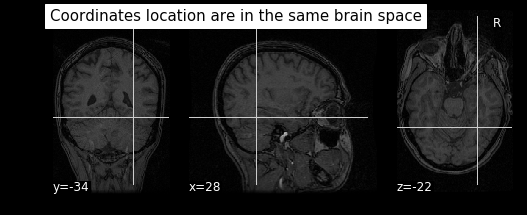

In [5]:
plotting.plot_anat(anat_img=anatomical_filename, cut_coords=(28, -34, -22),
                  title='Coordinates location are in the same brain space')

### Plotting Atlas maps

We show here, how to plot 4D atlas maps onto standard MNI template by default using tool: `plotting.plot_prob_atlas`

We make use of standard brain atlases available in Nilearn for easy visualization of any 4D maps (x, y, z, n_maps) without necessarily using for loop on each 4th dimensional index. Three different view_types are shown here with colors automatically chosen by itself.

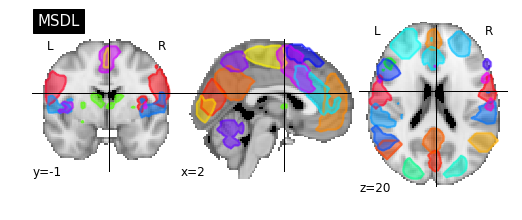

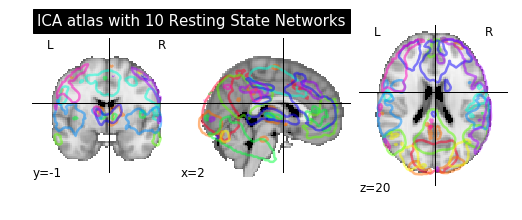

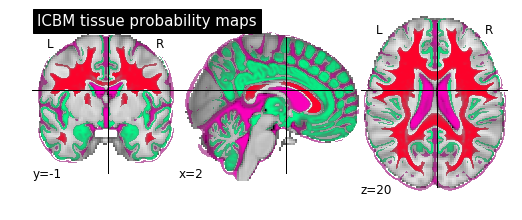

In [6]:
# We fetch and load the standard brain atlases from Nilearn datasets.atlas module
# Dictionary Learning atlas
msdl_atlas = datasets.fetch_atlas_msdl()
# Independent Component Analysis atlas
ica_atlas = datasets.fetch_atlas_smith_2009()
# ICBM tissue probabilistic maps
icbm_atlas = datasets.fetch_icbm152_2009()
wm = icbm_atlas['wm']
gm = icbm_atlas['gm']
csf = icbm_atlas['csf']

# Visualizing msdl_atlas with view_type='filled_contours'
plotting.plot_prob_atlas(maps_img=msdl_atlas['maps'], view_type='filled_contours',
                         title='MSDL')

# Visualizing ica_atlas with view_type='contours'
plotting.plot_prob_atlas(maps_img=ica_atlas.rsn10, view_type='contours',
                         title='ICA atlas with 10 Resting State Networks')

# Visualizing icbm_atlas with view_type='continuous'
plotting.plot_prob_atlas(maps_img=(wm, gm, csf), view_type='continuous',
                         title='ICBM tissue probability maps')

### Plotting statistical images

In this section, we show how to use plotting tools such as `plotting.plot_stat_map` and `plotting.plot_glass_brain` for an easy post-analysis visualization of statistical results overlayed onto aligned to specific anatomical images or default MNI template. Most suitable images are Z-map, T-map, ICA statistical maps.

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press on its own subject specific anatomical image. `plotting.plot_stat_map` is used here.

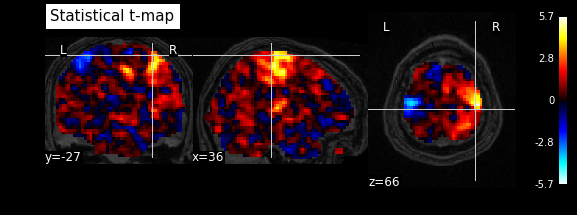

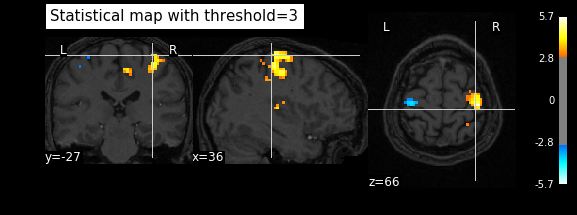

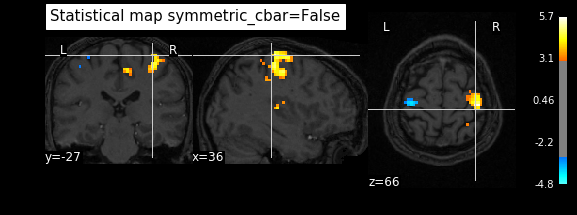

In [7]:
# Fetch t-contrasts maps from Nilearn datasets module
localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2,
    get_anats=True,
    get_tmaps=True)
localizer_anat_filename = localizer_dataset.anats[1]
localizer_tmap_filename = localizer_dataset.tmaps[1]

# Visualize statistical t-map on its anatomical image with colorbar
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map", cut_coords=(36, -27, 66))

# We focus on changing some interesting parameters

# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, title="Statistical map with threshold=3",
                       cut_coords=(36, -27, 66))

# Now, we visualize t-map with symmetric_cbar=False
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, title="Statistical map symmetric_cbar=False",
                       cut_coords=(36, -27, 66), symmetric_cbar=False)

More information on colorbar intensity displays, playing with parameter 'symmetric_cbar'.
By default symmetric_cbar='auto' which means colorbar range displays from -vmax to vmax as you can see in the top two plots. By switching symmetric_cbar to False means that colorbar range now displays from vmax and vmin as seen in bottom plot.

### Plotting ICA results

We show here, how to visualize Independent Component Analysis (ICA) results in 4D on default standard template using `plotting.plot_stat_map`.

In this use case, we make use of Nilearn function `nilearn.image.index_img` which drop downs the 4D maps image in (x, y, z, ica_map) to 3D map image (x, y, z) corresponding to 4th dimension specific ica map.

Note: index starts with 0 not 1.

Also, we show another cool Nilearn function `nilearn.image.iter_img` which now iterates over all ica maps in 4th dimension and visualize only in one direction

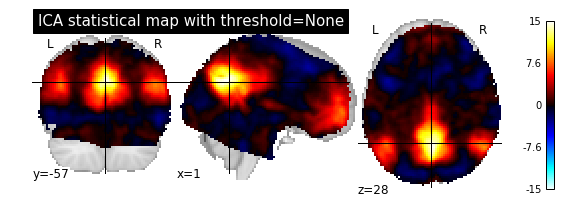

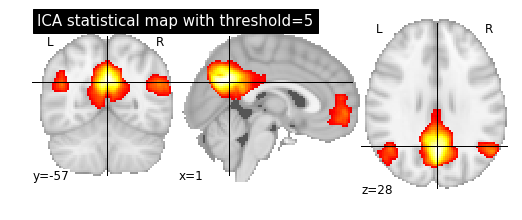

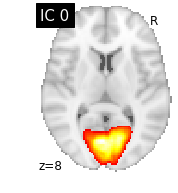

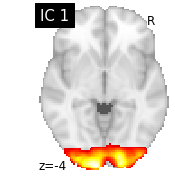

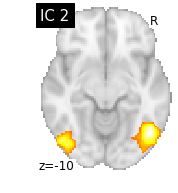

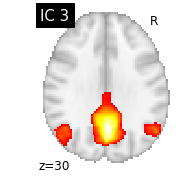

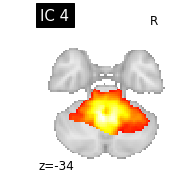

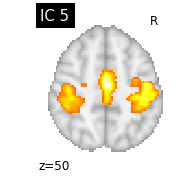

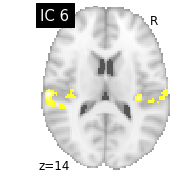

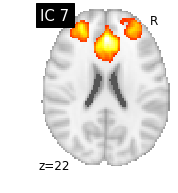

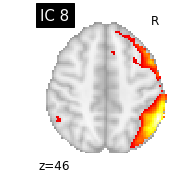

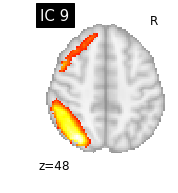

In [8]:
from nilearn.image import index_img

# Visualizing ica map of index 3
ica_maps = ica_atlas.rsn10
ica_3 = index_img(ica_maps, 3)
plotting.plot_stat_map(ica_3, cut_coords=(1, -57, 28),
                       title='ICA statistical map with threshold=None')

# Visualizing ica map with threshold=5
plotting.plot_stat_map(ica_3, threshold=5, cut_coords=(1, -57, 28),
                       title='ICA statistical map with threshold=5',
                      colorbar=False)

from nilearn.image import iter_img

# Visualizing ICA maps by iterating over 4th dimension using display_mode='z'
# and cut_coords=1 since we are choosing in only one directional mode
for i, each_map in enumerate(iter_img(ica_maps)):
    plotting.plot_stat_map(each_map, display_mode="z", title="IC %d" % i,
                           cut_coords=1, colorbar=False, threshold=5)

### Plotting statistical images using glass brain 

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press overlayed on cool glass brain schematics image. `plotting.plot_glass_brain` will be used here.

Note: Here, background image is not needed since background image is always brain schematic image and statistical map should be normalized to MNI brain space to be aligned properly.

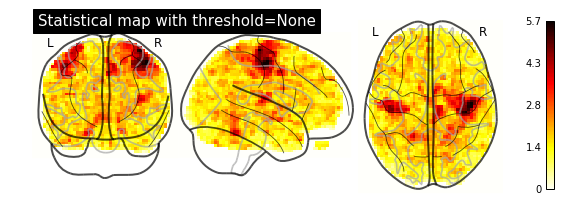

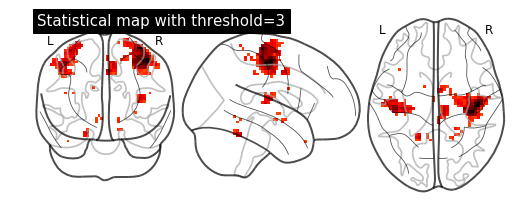

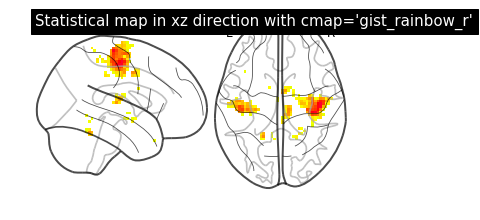

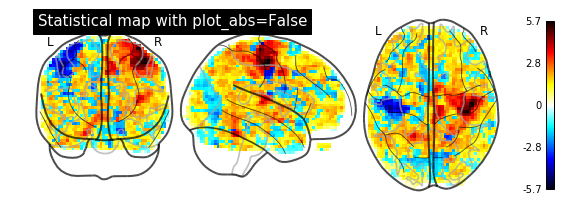

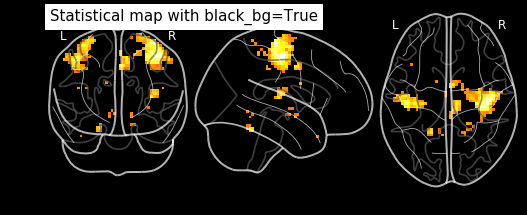

In [9]:
# Visualizing t-map with threshold=None
plotting.plot_glass_brain(localizer_tmap_filename, threshold=None,
                          title="Statistical map with threshold=None",
                          cut_coords=(36, -27, 66), colorbar=True)

# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          title="Statistical map with threshold=3",
                          cut_coords=(36, -27, 66))

# Visualizing with display_mode='xz' and change in color cmap='gist_rainbow_r'
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          title="Statistical map in xz direction with cmap='gist_rainbow_r'",
                          cut_coords=1, display_mode='xz', cmap='gist_rainbow_r')

# Visualizing with plot_abs=False and threshold=0
plotting.plot_glass_brain(localizer_tmap_filename, threshold=0, colorbar=True,
                          plot_abs=False, title='Statistical map with plot_abs=False')

# Visualizing with background color to black by black_bg=True
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, black_bg=True,
                          title='Statistical map with black_bg=True')

More notes on parameter 'plot_abs'. By default plot_abs=True which means that maximum intensity projection of positive and negative values will be in the same manner. If plot_abs=False, then the sign of the maximum intensity will be represented with different colors as shown in 4th plot compared with the rest of the plots.